## Actividad 5_V2

**Punto 9 de la actividad 5. Hacemos un data frame con la info del punto 7 para todas las galaxias de la simulación con masa mayor a 1e10**

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 07/' 
# path_win =

Cargamos la tabla de datos que descargamos:

In [7]:
table   = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')#,index_col='GalaxyID')

In [8]:
table_a = table[(table['Stars_Mass']>=1e10)].copy()
table_a

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,10.139413,30,1.307842e+11,0.000000,1411.312012,3.002119e+14
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,8.520104,30,3.944613e+10,0.000000,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


In [9]:
table_a.keys()

Index(['GalaxyID', 'GroupID', 'SnapNum', 'Redshift', 'SubGroupNumber',
       'CentreOfPotential_x', 'CentreOfPotential_y', 'CentreOfPotential_z',
       'Stars_Mass', 'SF_Mass', 'NSF_Mass', 'MassType_DM', 'MassType_BH',
       'HalfMassRad_Star', 'HalfMassRad_Gas', 'HalfMassRad_DM',
       'Stars_Hydrogen', 'Stars_Oxygen', 'Stars_Metallicity', 'SF_Hydrogen',
       'SF_Oxygen', 'SF_Metallicity', 'NSF_Hydrogen', 'NSF_Oxygen',
       'NSF_Metallicity', 'StarFormationRate', 'InitialMassWeightedStellarAge',
       'ApertureSize', 'Mass_Star', 'SFR_30pkpc', 'Group_R_Crit200',
       'Group_M_Crit200'],
      dtype='object')

In [23]:
#  n = 50                              #Como prueba tomo los primeros 50 valores de la tabla
n = len(table_a)                    #Acá tomo todas las galáxias mayores a 1e10 masas solares para armarnos la tabla del punto 7

N = np.arange(0,n)       

data = {'GalaxyID_test':[],'GroupID_test':[],'GalaxyID_V1':[],'GalaxyID_V2':[],'R_1':[],'R_2':[],'N_2':[]}#Defino las columnas de output
DATA = pd.DataFrame(data=data)

for i in N:
    
    mask   = (table_a['GalaxyID']==int(table_a['GalaxyID'].iloc[i]))  #usamos como máscara la galáxia i-ésima de la tabbla_a
    G_test = float(table_a['Stars_Mass'][mask])                       #masa de la galáxia
    x_test = table_a['CentreOfPotential_x'][mask]                     #nos guardamos su posición
    y_test = table_a['CentreOfPotential_y'][mask]
    z_test = table_a['CentreOfPotential_z'][mask]
    
    table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)].copy() #tabla para masas acotadas respecto de la i-ésima
    table_b['Distancias_test'] = np.sqrt( (table_b['CentreOfPotential_x']-float(x_test))**2
                                     +(table_b['CentreOfPotential_y']-float(y_test))**2
                                     +(table_b['CentreOfPotential_z']-float(z_test))**2)    #Nueva columna que tiene las distancias a la i-ésima
    
    N_2 = table_b[(table_b['Distancias_test']<=2)].sort_values(by=['Distancias_test'],ascending=True).copy() #Tabla con R<2Mpc
    
    if len(N_2)>2:
        data = {'GalaxyID_test':N_2.iloc[0,0],'GroupID_test':N_2.iloc[0,1],'GalaxyID_V1':N_2.iloc[1,0],
                'GalaxyID_V2':N_2.iloc[2,0],'R_1':N_2.iloc[1,32],'R_2':N_2.iloc[2,32],'N_2':len(N_2)-1}
        
    elif len(N_2)==2:
        data = {'GalaxyID_test':N_2.iloc[0,0],'GroupID_test':N_2.iloc[0,1],'GalaxyID_V1':N_2.iloc[1,0],
                'GalaxyID_V2':0,'R_1':N_2.iloc[1,32],'R_2':0,'N_2':len(N_2)-1}
        
    else:
        data = {'GalaxyID_test':N_2.iloc[0,0],'GroupID_test':N_2.iloc[0,1],'GalaxyID_V1':0,
                'GalaxyID_V2':0,'R_1':0,'R_2':0,'N_2':len(N_2)-1}
    
    DATA = DATA.append(data,ignore_index=True)
    
DATA = DATA.astype({'GalaxyID_test':int,'GroupID_test':int,'GalaxyID_V1':int,
                    'GalaxyID_V2':int,'R_1':float,'R_2':float,'N_2':int})      #Cambiamos el tipo de dato por columna
        

Imprimimos la tabla para ver que todo está bien:

In [24]:
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,N_2
0,9498012,28000000000002,9532694,3461244,0.505941,0.518791,35
1,9508202,28000000000002,9562859,14910180,0.257705,0.463580,3
2,9512113,28000000000002,3467928,9554089,0.150475,0.231956,34
3,9517736,28000000000002,9537911,9542932,0.423763,0.677967,35
4,9519365,28000000000002,9542932,9539937,0.634224,0.952579,34
...,...,...,...,...,...,...,...
3633,10365607,28000000002202,18478750,0,1.911730,0.000000,1
3634,10859653,28000000002570,9779252,0,1.526021,0.000000,1
3635,11104654,28000000002905,9034191,0,1.503464,0.000000,1
3636,11247394,28000000003127,0,0,0.000000,0.000000,0


# Calculo Rsep para asegurarnos que estén bien definidas las masas de cada una de las galaxias(R_{Sep}>2) 

También podemos oredenarlas por la cantidad de vecinos que tengan:

In [25]:
DATA.sort_values(by=['N_2'],ascending=False).head(20) # En éste caso son las 20 con mayor cantidad de vecinos

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,N_2
1186,2648881,28000000000001,124303,21379521,0.140117,0.174857,66
770,135177,28000000000001,9443123,8193525,0.095794,0.138793,65
777,124303,28000000000001,21379521,127771,0.092964,0.127569,65
1247,2642936,28000000000001,9443123,122970,0.161871,0.203874,65
1302,2632459,28000000000001,2648881,8259238,0.209893,0.259623,65
831,8242261,28000000000001,9454253,8206767,0.506254,0.679747,64
767,130677,28000000000001,127771,124303,0.065322,0.133753,63
1301,2632002,28000000000001,9472588,2632459,0.565795,0.789340,63
776,122970,28000000000001,9443123,8166017,0.144795,0.190500,63
1250,2638163,28000000000001,2648881,9475624,0.331715,0.337249,63


In [58]:
# DATA.to_csv(path_or_buf= pwd+'/Actividad_5_v2.dat',index=False)   # Nos guardamos los datos

## Scatter plots de una galaxia central junto con las que se encuantran a menos de 2Mpc

Tomamos el GalaxyID de la galáxia central que queremos graficar, que podemos sacarlo de la tabla DATA de arriba:

In [73]:
GalaxyID_test = 2721236

In [74]:
mask = (table_a['GalaxyID']== GalaxyID_test)

G_test = float(table_a['Stars_Mass'][mask])

xmax = table_a['CentreOfPotential_x'][mask]
ymax = table_a['CentreOfPotential_y'][mask]
zmax = table_a['CentreOfPotential_z'][mask]

table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)&((table_a['Stars_Mass']/G_test)<10)].copy()

table_b['Distancias_test'] = np.sqrt((table_b['CentreOfPotential_x']-float(xmax))**2
                                    +(table_b['CentreOfPotential_y']-float(ymax))**2
                                    +(table_b['CentreOfPotential_z']-float(zmax))**2)

N_2 = table_b[(table_b['Distancias_test']<=2)].sort_values(by=['Distancias_test'],ascending=True).copy()

**Eje x-y del C.O.P**

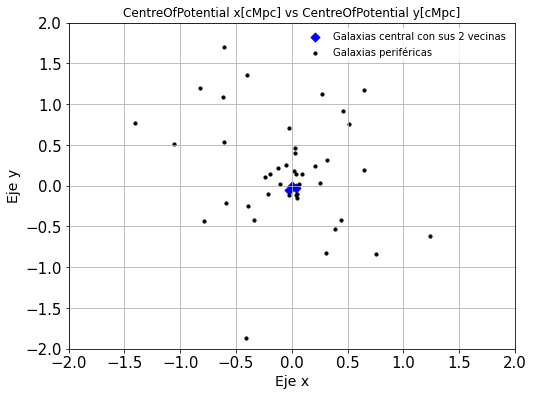

In [75]:
eje_1 = 'x'
eje_2 = 'y'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(ymax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(ymax)


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje x-z del C.O.P**

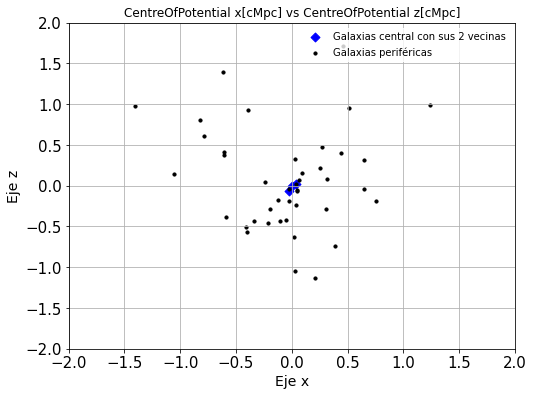

In [76]:
eje_1 = 'x'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje y-z del C.O.P**

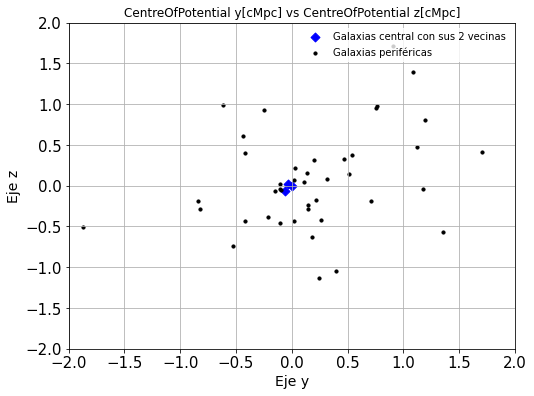

In [77]:
eje_1 = 'y'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(ymax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(ymax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)

ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Ploteo en 3D**

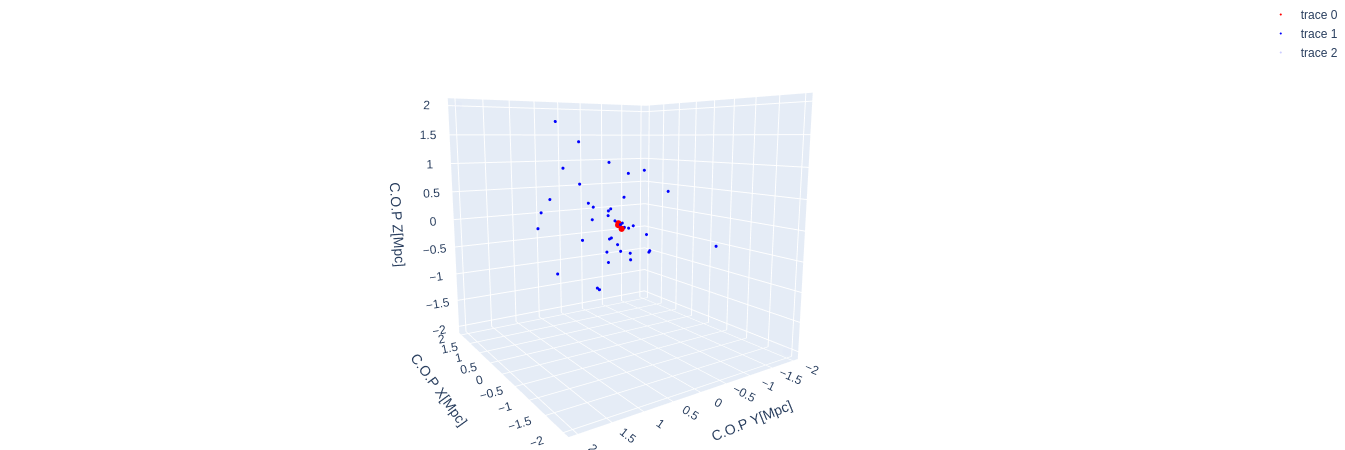

In [78]:
xvar_1= N_2['CentreOfPotential_x'].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_y'].iloc[0:3]-float(ymax)
zvar_1= N_2['CentreOfPotential_z'].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_x'].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_y'].iloc[3:]-float(ymax)
zvar_2= N_2['CentreOfPotential_z'].iloc[3:]-float(zmax)

x_lim = [-2,2]
y_lim = [-2,2]
z_lim = [-2,2]

fig = go.Figure(data=[go.Scatter3d(
    x=xvar_1,
    y=yvar_1,
    z=zvar_1,
    mode='markers',
    marker=dict(
        size = 2,
        color='red',
        opacity=1
    )
    ),go.Scatter3d(
        x=xvar_2,
        y=yvar_2,
        z=zvar_2,
        mode='markers',
        marker=dict(
        size = 1,
        color='blue',
        opacity=1
    )      
    ),go.Scatter3d(
        x=x_lim,
        y=y_lim,
        z=z_lim,
        mode='markers',
        marker=dict(
        size=0,
        color='blue',
        opacity=0.01))
                     ])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=70,
                    margin =dict(l=0, r=0, b=0, t=0))



fig.show()


In [ ]:
def spheres(size, clr, dist=0): 
    
    # Set up 100 points. First, do angles
    theta = np.linspace(0,2*np.pi,100)
    phi = np.linspace(0,np.pi,100)
    
    # Set up coordinates for points on the sphere
    x0 = dist + size * np.outer(np.cos(theta),np.sin(phi))
    y0 = size * np.outer(np.sin(theta),np.sin(phi))
    z0 = size * np.outer(np.ones(100),np.cos(phi))
    
    # Set up trace
    trace= go.Surface(x=x0, y=y0, z=z0, colorscale=[[0,clr], [1,clr]])
    trace.update(showscale=False)

    return trace